In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET
import os,glob,sys
import pylheV
import scipy as sc

sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

In [3]:
particlesDict = {}

In [4]:
with open("particles.xml") as f:
    xmlStr = f.read()
    xmlStr = "<root>\n" + xmlStr[:] + "</root>" 
root = ET.fromstring(xmlStr)

In [5]:
for particle in root:
    particleData  = particle.attrib
    pid = int(particleData['id'])
    particlesDict[pid] = {}
    for attr,val in particle.attrib.items():
        try:
            particlesDict[pid][attr] = eval(val) #Try to evaluate attribute
        except:
            particlesDict[pid][attr] = val

In [58]:
#This function calculates the invariant mass of a particle using the final particles
def invariant_mass_lplm(file_name):
    invariant_mass = []
    for e in pylheV.readLHE(file_name):
        energy = 0
        px = 0
        py = 0
        pz = 0
        for ptc in e.particles:
            
            if ptc.status > 0:
                if abs(ptc.id) > 10 and abs(ptc.id) <19 :
                    #Summing all components of final particles
                    energy = energy + ptc.e
                    px = px + ptc.px
                    py = py + ptc.py
                    pz = pz + ptc.pz
                
        
        #Calculating the invariant mass
        inv_mass = np.sqrt(energy**2 - px**2 - py**2 - pz**2)
        
                
                    

        invariant_mass.append(inv_mass)

                
    return invariant_mass
   
                

In [ ]:
#This function calculates the invariant mass of a particle using the final particles
def invariant_mass(file_name):
    invariant_mass = []
    for e in pylheV.readLHE(file_name):
        energy = 0
        px = 0
        py = 0
        pz = 0
        for ptc in e.particles:
            
            if ptc.status > 0:
                #Summing all components of final particles
                energy = energy + ptc.e
                px = px + ptc.px
                py = py + ptc.py
                pz = pz + ptc.pz
                
        
        #Calculating the invariant mass
        inv_mass = np.sqrt(energy**2 - px**2 - py**2 - pz**2)
        
                
                    

        invariant_mass.append(inv_mass)

                
    return invariant_mass
   
                

In [7]:
cross_section_lplm = [2140,2428,1715] #pb
cross_section_n = [6.261,328.9,46.02]

In [48]:
m_lplm_50 = invariant_mass('lplm_50GeV.lhe')
m_lplm_100 = invariant_mass('lplm_100GeV.lhe')
m_lplm_150 = invariant_mass('lplm_150GeV.lhe')
m_nuBarnu_50 = invariant_mass('nuBarnu_50GeV.lhe')
m_nuBarnu_100 = invariant_mass('nuBarnu_100GeV.lhe')
m_nuBarnu_150 = invariant_mass('nuBarnu_150GeV.lhe')


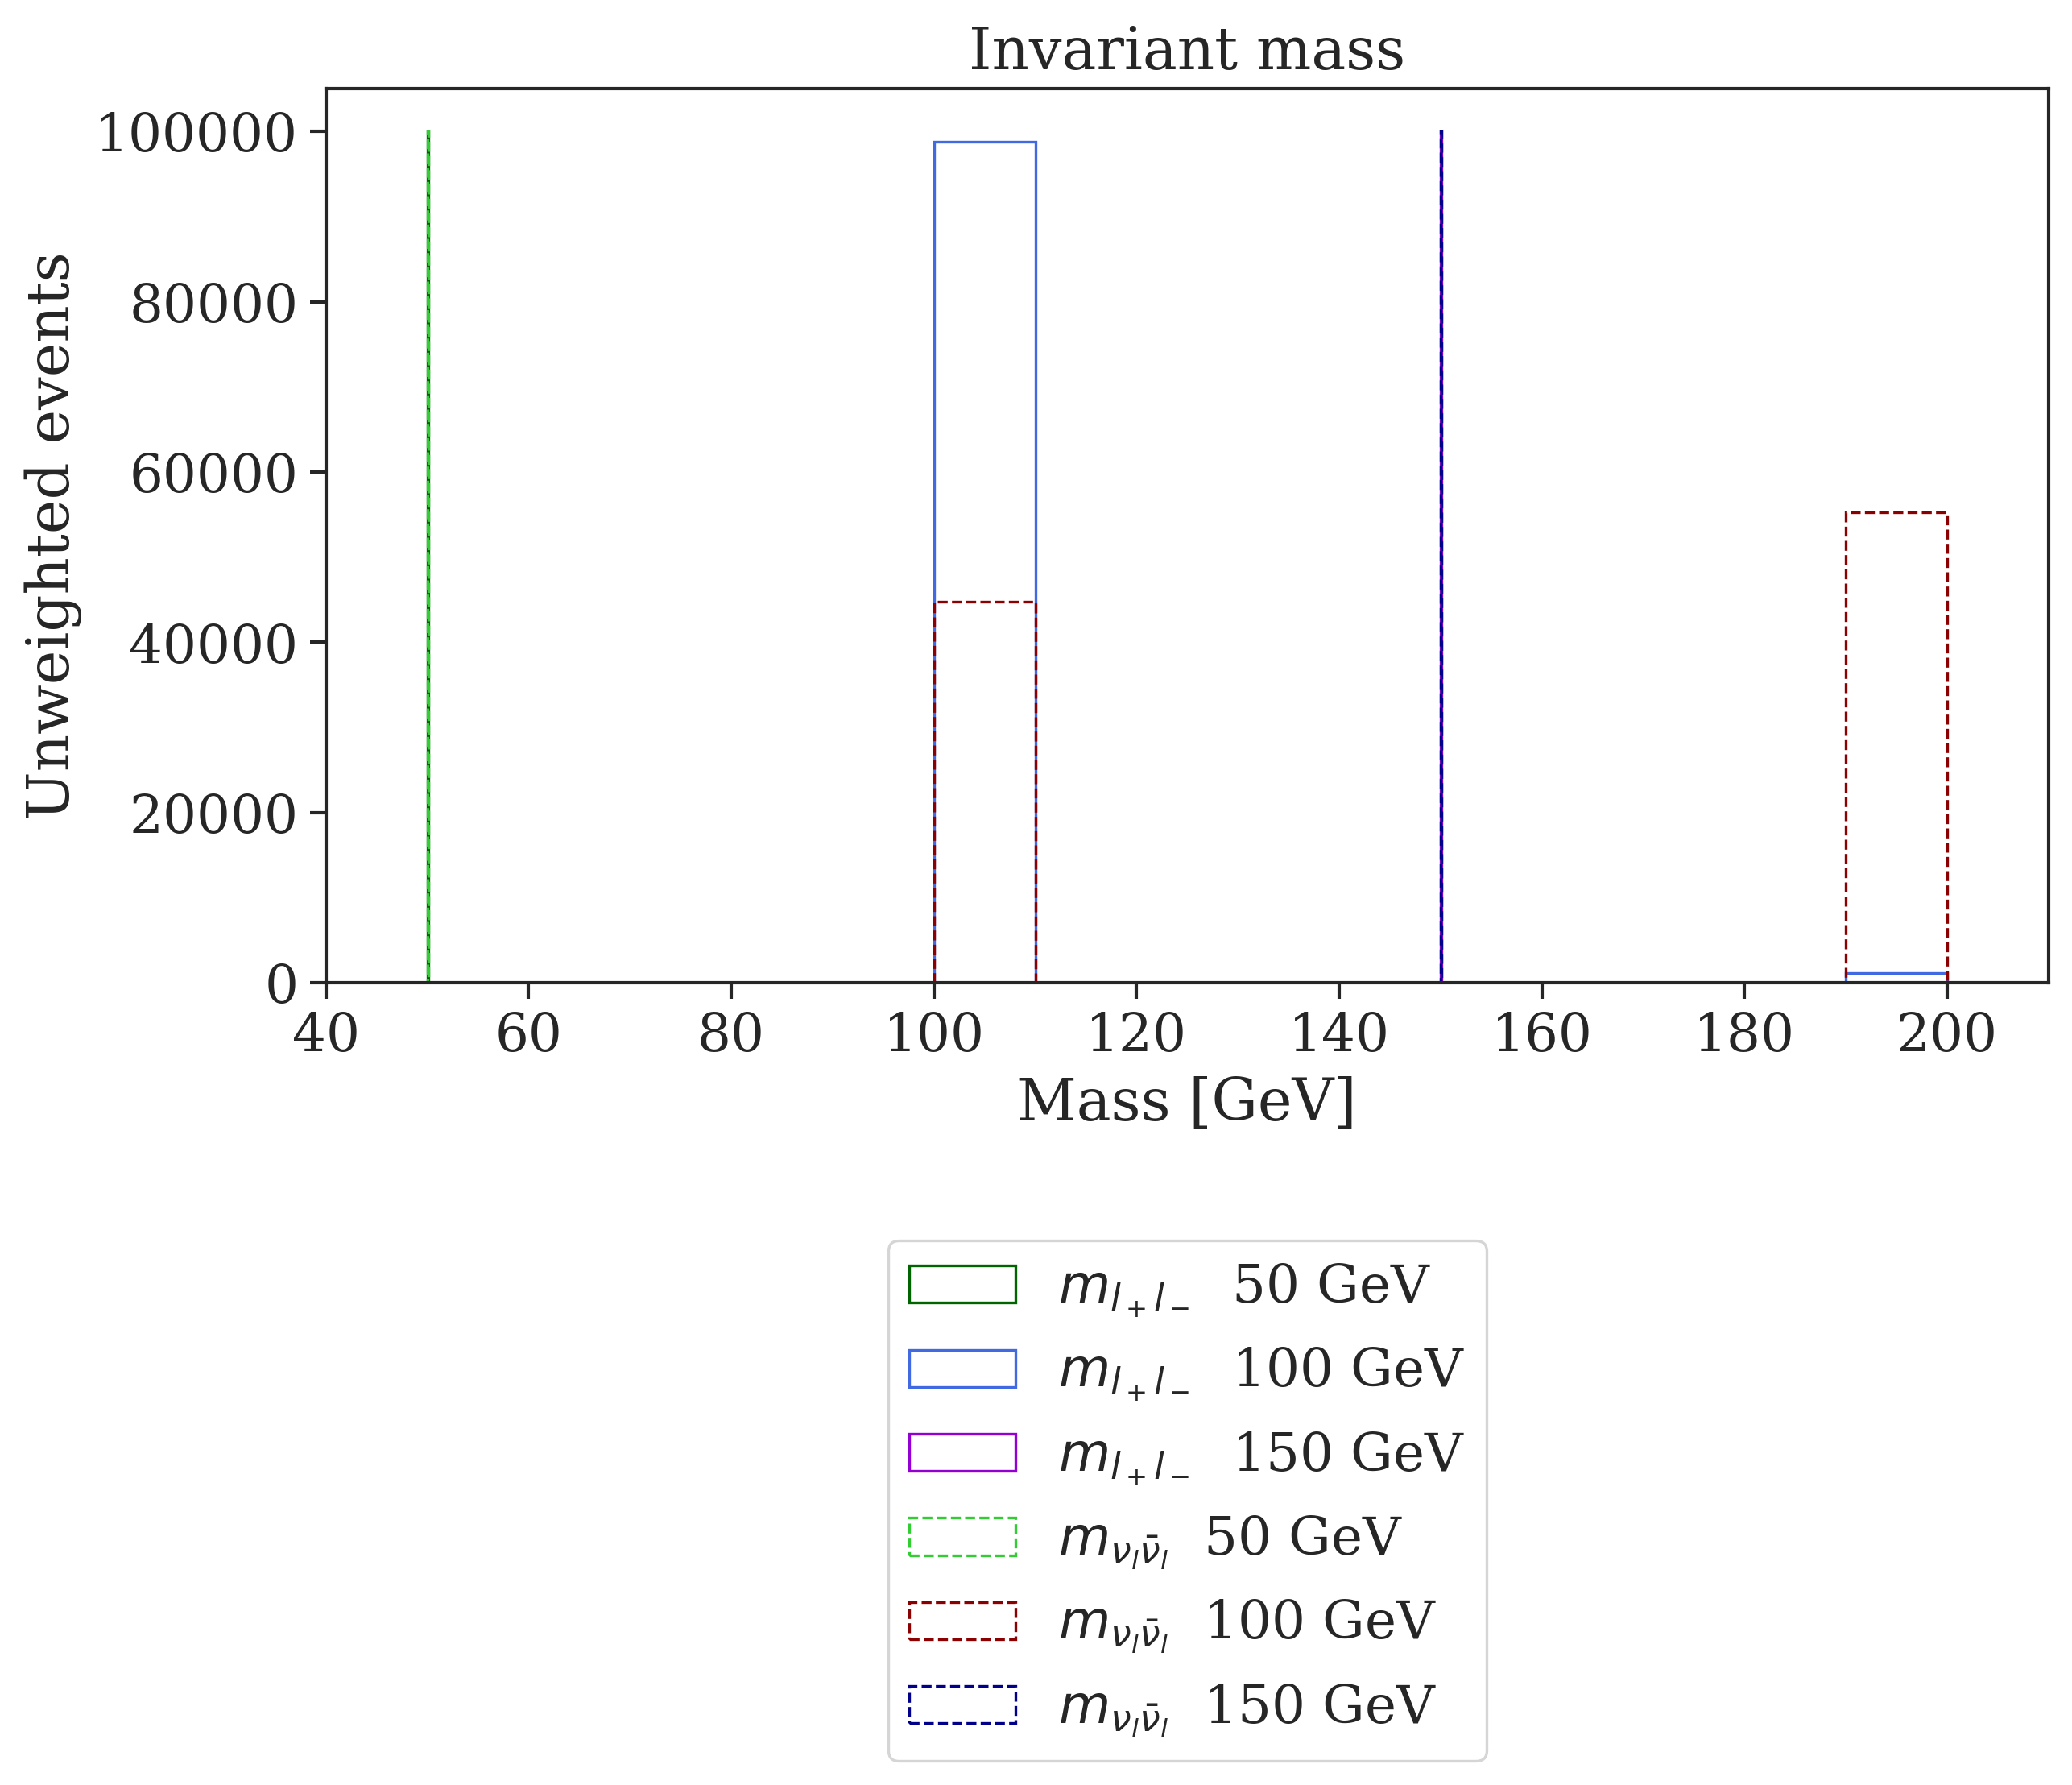

In [56]:
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
plt.hist(m_lplm_50, bins = 10, histtype = 'step',  color = 'darkgreen',label =r'$m_{l_+l_-}$  50 GeV ')
plt.hist(m_lplm_100, bins = 10,  histtype = 'step',color = 'royalblue',label =r'$m_{l_+l_-}$  100 GeV ')
plt.hist(m_lplm_150, bins = 10,  histtype = 'step',color = 'darkviolet',label =r'$m_{l_+l_-}$  150 GeV ')
plt.hist(m_nuBarnu_50, bins = 10, histtype = 'step', ls = '--',  color = 'limegreen',label =r'$m_{\nu_l\bar{\nu}_l}$  50 GeV ')
plt.hist(m_nuBarnu_100, bins = 10, histtype = 'step', ls = '--', color = 'darkred',label =r'$m_{\nu_l\bar{\nu}_l}$  100 GeV ')
plt.hist(m_nuBarnu_150, bins = 10, histtype = 'step',  ls = '--',color = 'darkblue',label =r'$m_{\nu_l\bar{\nu}_l}$  150 GeV ')



plt.xlabel(r'Mass [GeV]')
plt.title(r'Invariant mass')
plt.ylabel(r'Unweighted events')
plt.xlim([40,210])
plt.legend(bbox_to_anchor=(0.5, -0.9), loc='lower center')
plt.savefig('Invariant_mass_epem.pdf')
plt.show()

In [70]:
m_lplm_50 = invariant_mass_lplm('out_lplm_50GeV.lhe')
m_lplm_100 = invariant_mass_lplm('out_lplm_100GeV.lhe')
m_lplm_150 = invariant_mass_lplm('out_lplm_150GeV.lhe')
m_nuBarnu_100 = invariant_mass('out_nuBarnu_100GeV.lhe')
m_nuBarnu_50 = invariant_mass('nuBarnu_50GeV.lhe')
m_nuBarnu_150 = invariant_mass('nuBarnu_150GeV.lhe')



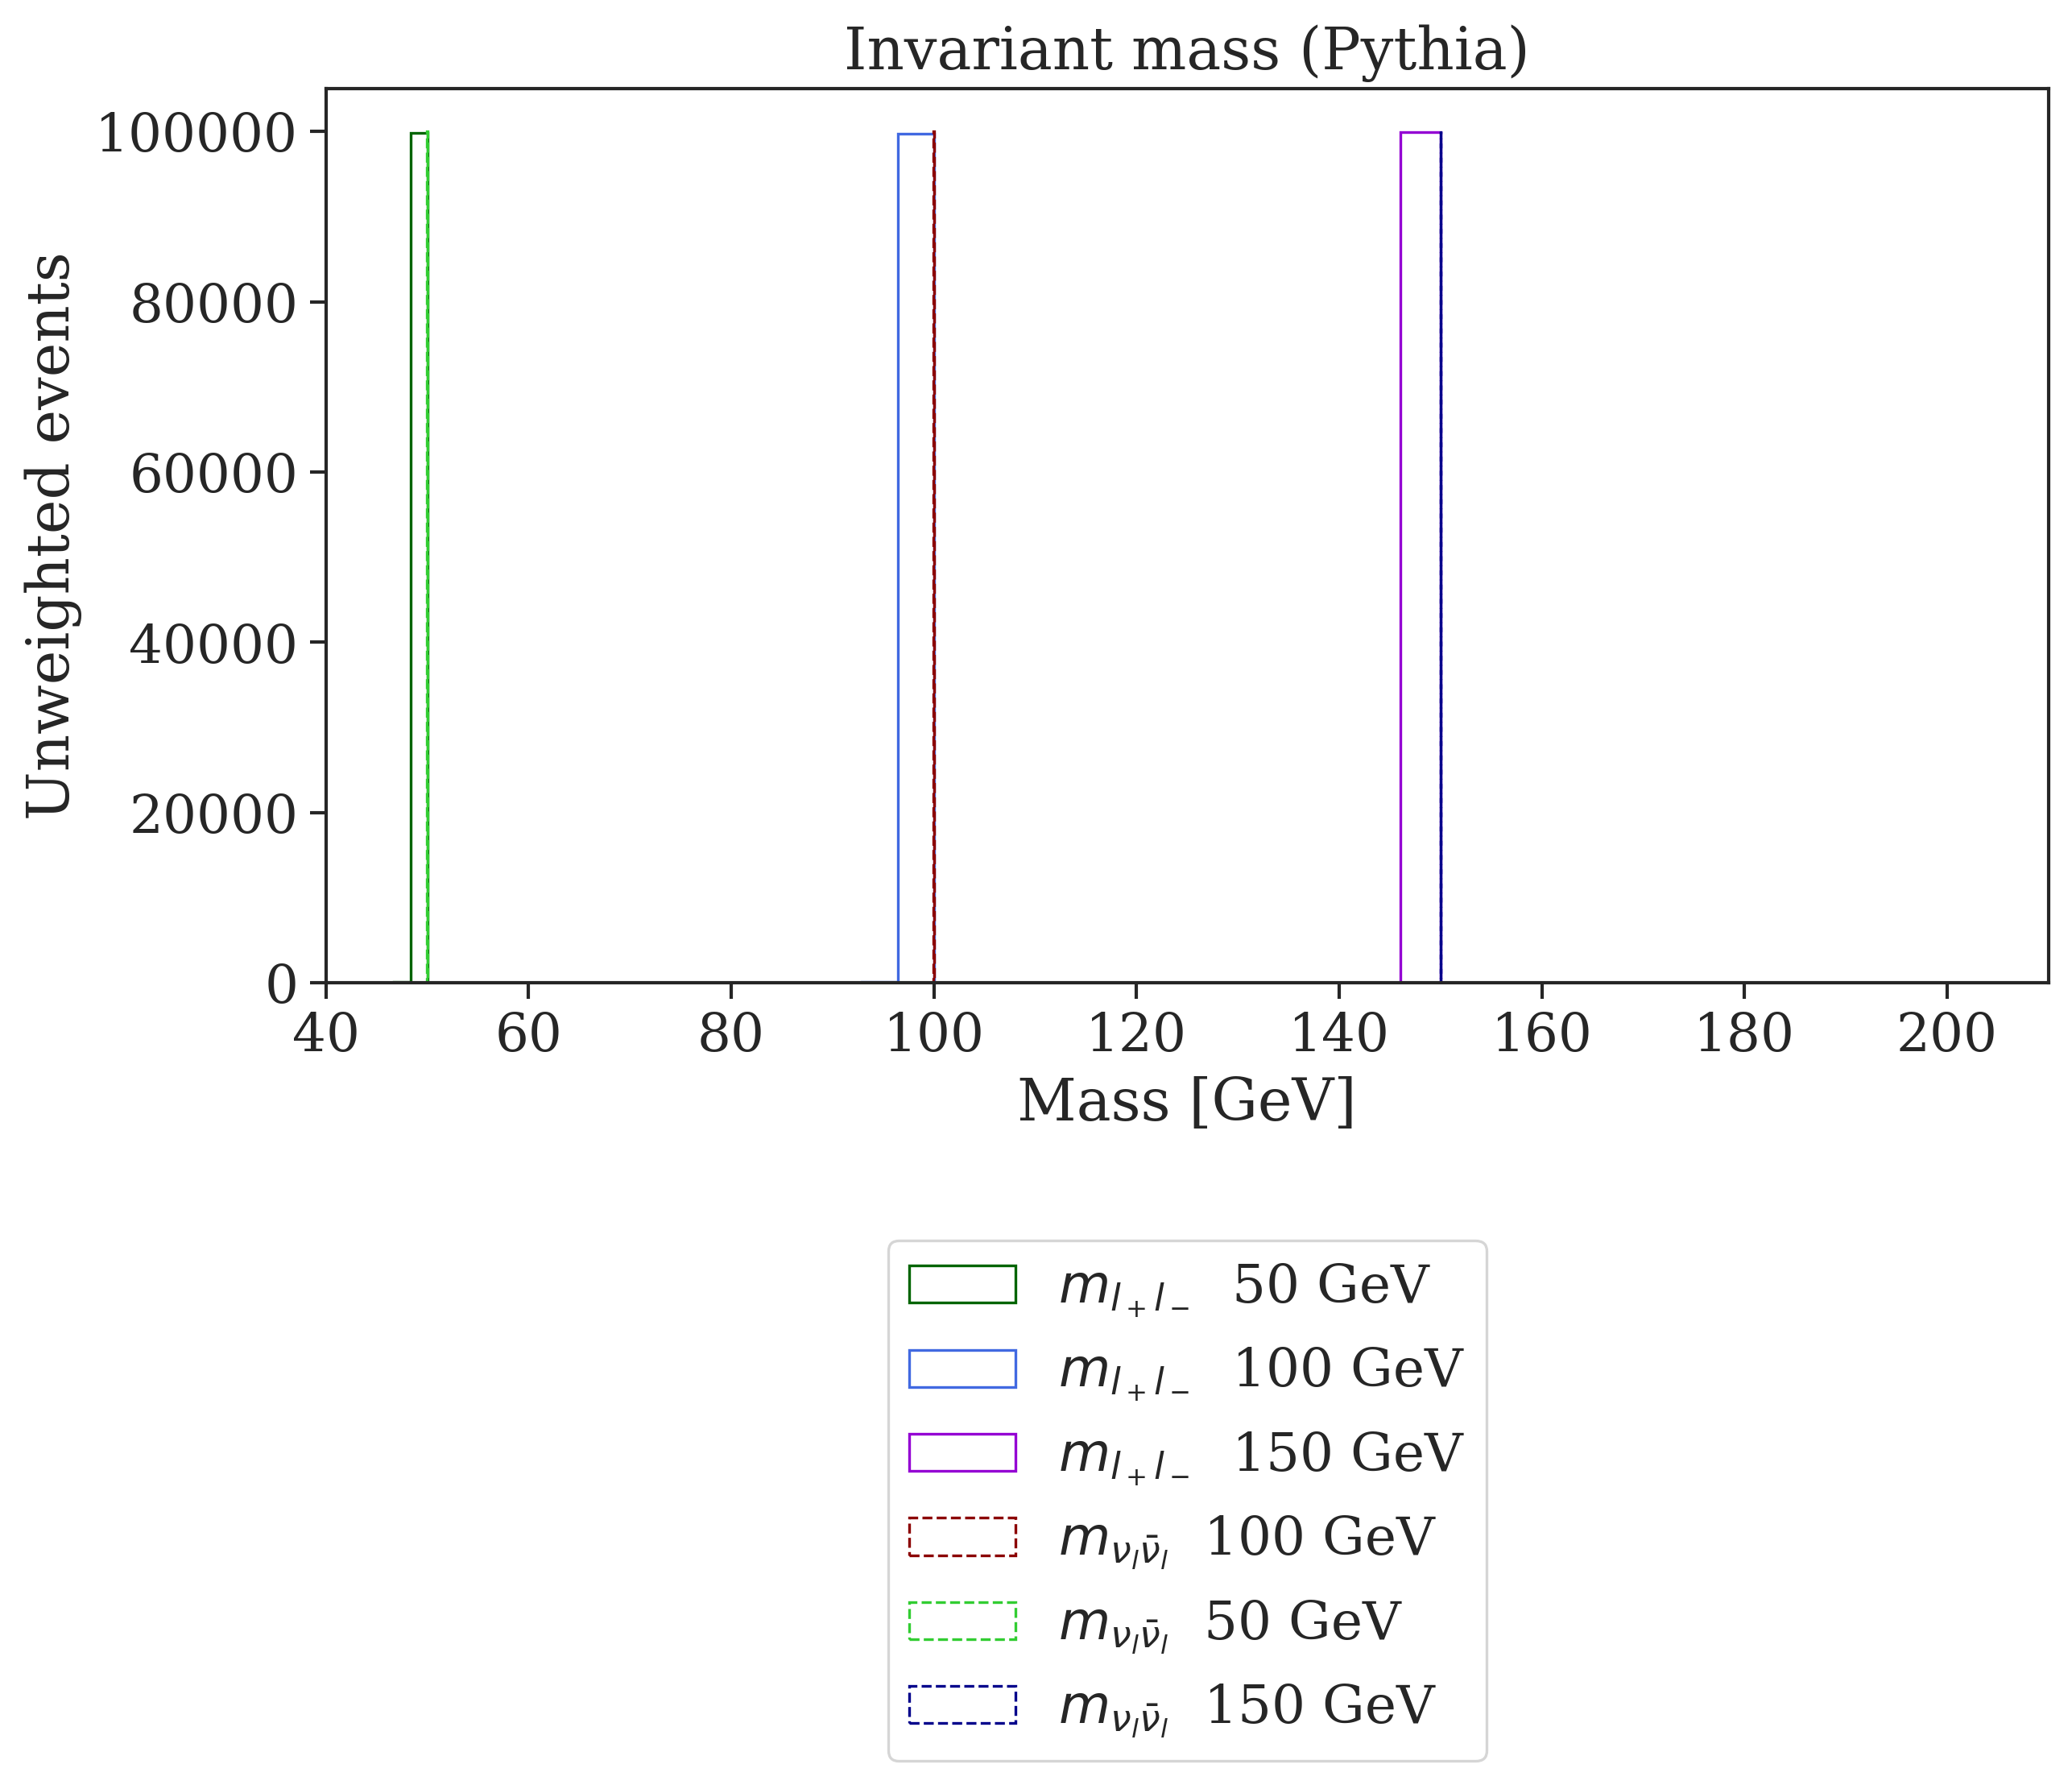

In [72]:
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
plt.hist(m_lplm_50, bins = 25, histtype = 'step',  color = 'darkgreen',label =r'$m_{l_+l_-}$  50 GeV ')
plt.hist(m_lplm_100, bins = 25,  histtype = 'step',color = 'royalblue',label =r'$m_{l_+l_-}$  100 GeV ')
plt.hist(m_lplm_150, bins = 25,  histtype = 'step',color = 'darkviolet',label =r'$m_{l_+l_-}$  150 GeV ')
plt.hist(m_nuBarnu_100, bins = 25, histtype = 'step', ls = '--', color = 'darkred',label =r'$m_{\nu_l\bar{\nu}_l}$  100 GeV ')
plt.hist(m_nuBarnu_50, bins = 25, histtype = 'step', ls = '--',  color = 'limegreen',label =r'$m_{\nu_l\bar{\nu}_l}$  50 GeV ')
plt.hist(m_nuBarnu_150, bins = 25, histtype = 'step',  ls = '--',color = 'darkblue',label =r'$m_{\nu_l\bar{\nu}_l}$  150 GeV ')



plt.xlabel(r'Mass [GeV]')
plt.title(r'Invariant mass (Pythia)')
plt.ylabel(r'Unweighted events')
plt.xlim([40,210])
plt.legend(bbox_to_anchor=(0.5, -0.9), loc='lower center')
plt.savefig('Invariant_mass_epem.pdf')
plt.show()